In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from get_dataframes import get_global_df


In [2]:
global_df = get_global_df(results_path="../../../experiments/final_experiments")

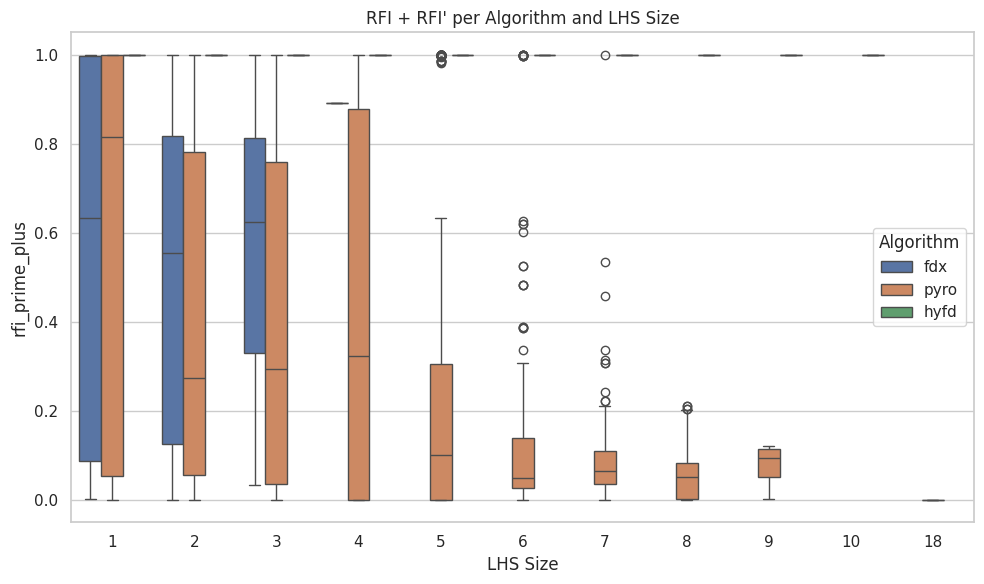

In [3]:
metric_name="rfi_prime_plus"

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=global_df,
    x='lhs_size',
    y=metric_name,
    hue='algorithm'
)

plt.title('RFI + RFI\' per Algorithm and LHS Size')
plt.xlabel('LHS Size')
plt.ylabel(metric_name)
plt.legend(title='Algorithm')
plt.tight_layout()
plt.show()

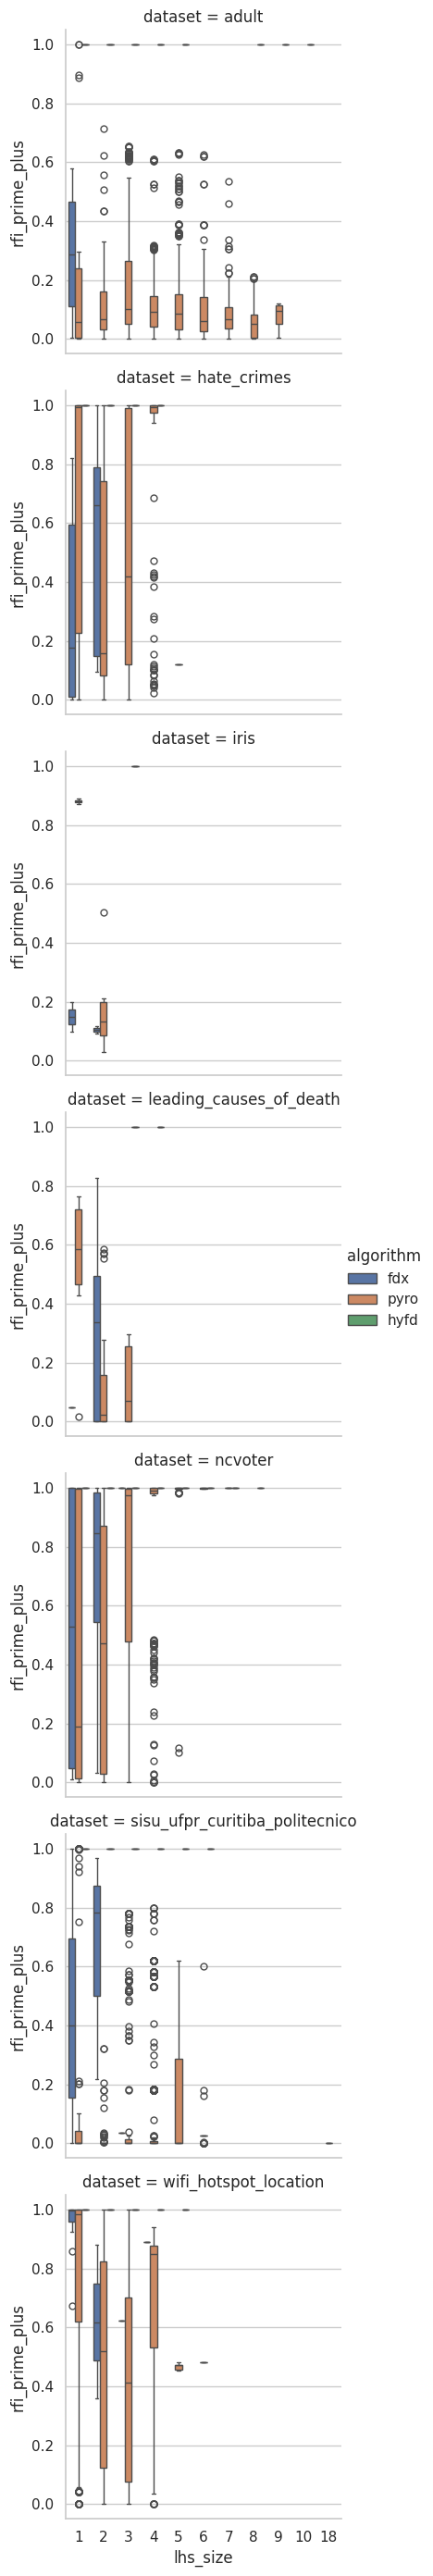

In [4]:
sns.catplot(
    data=global_df,
    x='lhs_size',
    y=metric_name,
    hue='algorithm',
    col='dataset',
    kind='box',
    col_wrap=1,
    height=4,
    aspect=1
)
